In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import model_selection
from sklearn import preprocessing

#On importe les donnes
B = pd.read_csv('20var.csv', delimiter= ',',header=0)

In [2]:
B.rename(columns={'Unnamed: 0':'cle'}, inplace=True)
print(B)

       cle  mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0        0        6          0      0              3            5          0   
1        1        0          0      2              4            2          0   
2        2        6          0      2              4            2          0   
3        3        6          0      0              4            2          0   
4        4        0          0      0              3            6          0   
...    ...      ...        ...    ...            ...          ...        ...   
5817  5817        6          0      2              3            3          0   
5818  5818        0          0      0              5            5          0   
5819  5819        6          0      2              3            4          0   
5820  5820        6          0      0              6            0          0   
5821  5821        0          0      1              3            0          0   

      niv_etud_bas  revenu_moyen  niv_e

In [3]:
varexpliquee = B['assur_caravane']

In [26]:
#Preparation
C = B.copy()

X_knn = C[C.columns[1:-1]]
#print(X_knn)

#Créer le vecteur d'étiquettes
y_knn = C['assur_caravane']
#print(y_knn)


#Over / Under sampling

#Resultat incroyable
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_knn, y_knn)

#print(X_resampled)
#print(y_resampled)

#Separation en table entrainement et test
X_train, x_test, y_train, y_test = model_selection.train_test_split(X_resampled, y_resampled, test_size=0.25)

# Optimisation du paramètre de complexité k

# Grille de valeurs

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10, 11, 13, 15]}

# Choix du score à optimiser
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf_knn = GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf_knn.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf_knn.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf_knn.cv_results_['mean_test_score'], # score moyen
        clf_knn.cv_results_['std_test_score'],  # écart-type du score
        clf_knn.cv_results_['params']           # valeur de l'hyperparamètre
    ):
    print("{} = {:.3f} (+/-{:.03f}) for {}".format(score,mean,std*2,params))

# Meilleur choix de l'hyperparmetre k : 2

#Mesure de performance (avec k = 2)

# Prévision de l'échantillon test
pred = clf_knn.predict_proba(x_test)
print(pred)

# # Precision
# print("\n precision")
# print(precision_score(y_test,pred))

# # Rappel
# print("\n rappel")
# print(recall_score(y_test,pred))

# # F1 score
# print("\n score f1")
# print(f1_score(y_test,pred))

# # Matrice de confusion
# print(confusion_matrix(y_test,pred))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 2}
Résultats de la validation croisée :
accuracy = 0.981 (+/-0.005) for {'n_neighbors': 1}
accuracy = 0.982 (+/-0.004) for {'n_neighbors': 2}
accuracy = 0.959 (+/-0.009) for {'n_neighbors': 3}
accuracy = 0.965 (+/-0.007) for {'n_neighbors': 4}
accuracy = 0.933 (+/-0.004) for {'n_neighbors': 5}
accuracy = 0.939 (+/-0.010) for {'n_neighbors': 6}
accuracy = 0.910 (+/-0.011) for {'n_neighbors': 7}
accuracy = 0.919 (+/-0.006) for {'n_neighbors': 8}
accuracy = 0.893 (+/-0.012) for {'n_neighbors': 9}
accuracy = 0.897 (+/-0.011) for {'n_neighbors': 10}
accuracy = 0.877 (+/-0.009) for {'n_neighbors': 11}
accuracy = 0.866 (+/-0.013) for {'n_neighbors': 13}
accuracy = 0.857 (+/-0.010) for {'n_neighbors': 15}
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [5]:
#Retraitement des variables

#Seulement celle ayant de mauvaises queues de distribution

#print(B)
X = B[B.columns[1:-1]]
print(X)

#Créer le vecteur d'étiquette
y = B['assur_caravane']

X_new = X.values
print(X_new)


      mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0           6          0      0              3            5          0   
1           0          0      2              4            2          0   
2           6          0      2              4            2          0   
3           6          0      0              4            2          0   
4           0          0      0              3            6          0   
...       ...        ...    ...            ...          ...        ...   
5817        6          0      2              3            3          0   
5818        0          0      0              5            5          0   
5819        6          0      2              3            4          0   
5820        6          0      0              6            0          0   
5821        0          0      1              3            0          0   

      niv_etud_bas  revenu_moyen  niv_etude_haut  revenu1  proprietaire  \
0                7             4    

0    2845
6    2319
5     613
7      41
8       3
4       1
Name: mt_auto, dtype: int64
[2 0 2 ... 2 2 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0    2845
2    2363
1     614
Name: mt_auto, dtype: int64


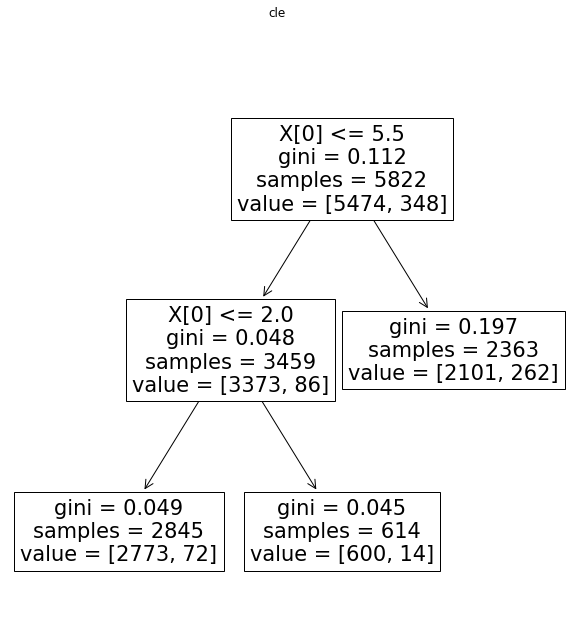

In [6]:
#mt_auto

print(X['mt_auto'].value_counts())

arbre_cla_mta=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mta.fit(X_new[:,0].reshape(X_new.shape[0],1),varexpliquee)
mt_at=np.repeat(-1,X_new.shape[0])
mt_at[X_new[:,0]<=2.0]=0
mt_at[(X_new[:,0]>2.0) & (X_new[:,0]<=5.5)]=1
mt_at[(X_new[:,0]>5.5)]=2

print(mt_at)

for i in range(0,5822):
    X['mt_auto'].iloc[i] = mt_at[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mta) 

print(X['mt_auto'].value_counts())

0    5789
1      31
2       2
Name: nb_bateau, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    5789
1      33
Name: nb_bateau, dtype: int64


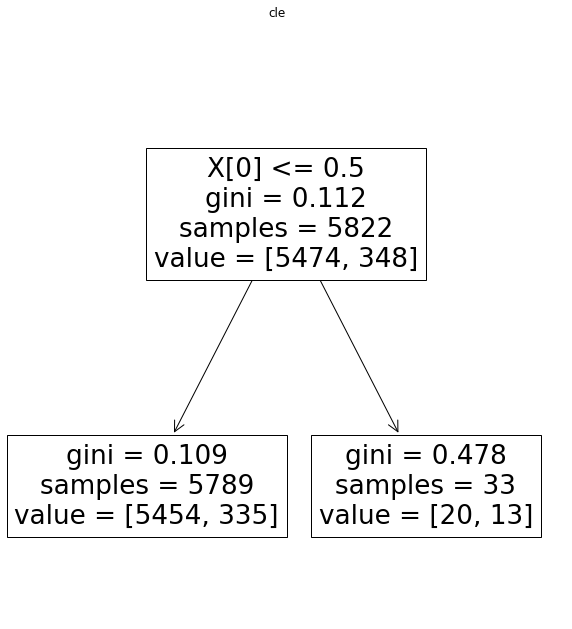

In [7]:
#nb_bateau

print(X['nb_bateau'].value_counts())

arbre_cla_nbb=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_nbb.fit(X_new[:,1].reshape(X_new.shape[0],1),varexpliquee)
nb_b=np.repeat(-1,X_new.shape[0])
nb_b[X_new[:,1]<=0.5]=0
nb_b[(X_new[:,1]>0.5)] = 1

print(nb_b)

for i in range(0,5822):
    X['nb_bateau'].iloc[i] = nb_b[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_nbb) 

print(X['nb_bateau'].value_counts())

0    3482
2    2128
1     201
3      11
Name: mt_RC, dtype: int64
[0 2 2 ... 2 0 1]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0    3482
2    2139
1     201
Name: mt_RC, dtype: int64


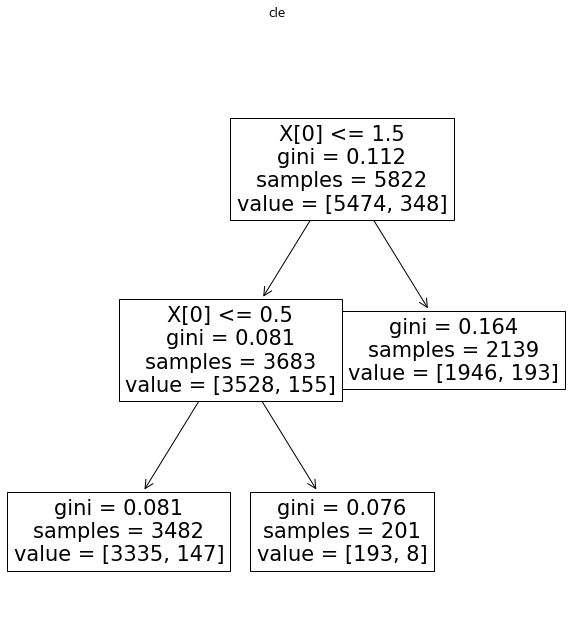

In [8]:
#mt_RC

print(X['mt_RC'].value_counts())

arbre_cla_mtrc=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mtrc.fit(X_new[:,2].reshape(X_new.shape[0],1),varexpliquee)
mt_rc=np.repeat(-1,X_new.shape[0])
mt_rc[X_new[:,2]<=0.5]=0
mt_rc[(X_new[:,2]>0.5) & (X_new[:,2]<=1.5)]=1
mt_rc[(X_new[:,2]>1.5)]=2

print(mt_rc)

for i in range(0,5822):
    X['mt_RC'].iloc[i] = mt_rc[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mtrc) 

print(X['mt_RC'].value_counts())

0    2666
4    1226
3     920
2     535
1     161
6     155
5     149
7       9
8       1
Name: mt_incendie, dtype: int64
[3 1 1 ... 2 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0    2666
2    2146
1     696
3     314
Name: mt_incendie, dtype: int64


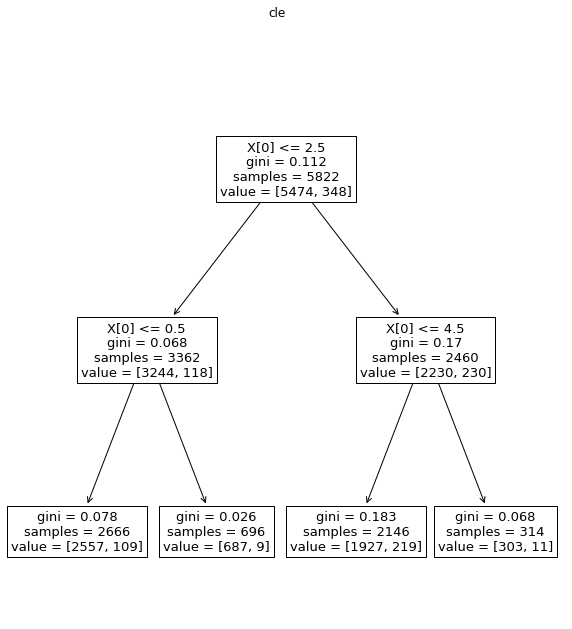

In [9]:
#mt_incendie

print(X['mt_incendie'].value_counts())

arbre_cla_mtinc=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_mtinc.fit(X_new[:,4].reshape(X_new.shape[0],1),varexpliquee)
mt_in=np.repeat(-1,X_new.shape[0])
mt_in[X_new[:,4]<=0.5]=0
mt_in[(X_new[:,4]>0.5) & (X_new[:,4]<=2.5)]=1
mt_in[(X_new[:,4]>2.5) & (X_new[:,4]<=4.5)]=2
mt_in[(X_new[:,4]>4.5)]=3

print(mt_in)

for i in range(0,5822):
    X['mt_incendie'].iloc[i] = mt_in[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mtinc) 

print(X['mt_incendie'].value_counts())

0    5789
4      13
3       5
2       5
1       5
6       3
5       2
Name: mt_bateau, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    5789
1      33
Name: mt_bateau, dtype: int64


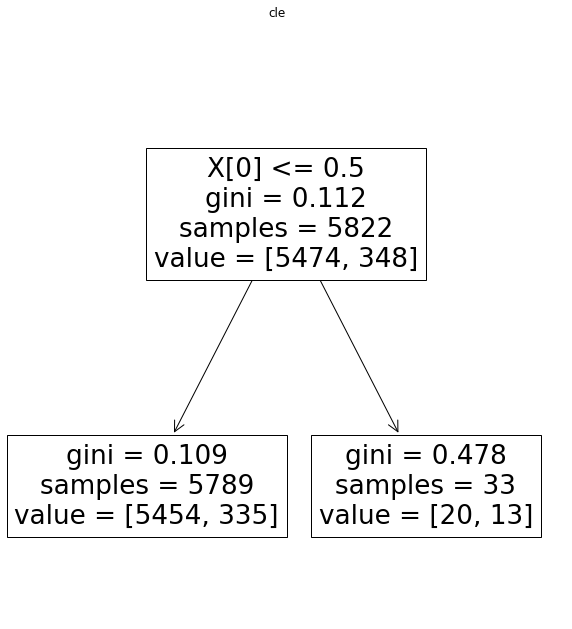

In [10]:
#mt_bateau

print(X['mt_bateau'].value_counts())

arbre_cla_mtb=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_mtb.fit(X_new[:,5].reshape(X_new.shape[0],1),varexpliquee)
mt_b=np.repeat(-1,X_new.shape[0])
mt_b[X_new[:,5]<=0.5]=0
mt_b[(X_new[:,5]>0.5)]=1

print(mt_b)

for i in range(0,5822):
    X['mt_bateau'].iloc[i] = mt_b[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_mtb) 

print(X['mt_bateau'].value_counts())

3    1932
4    1854
5     733
2     651
6     355
7     131
8      70
1      49
0      25
9      22
Name: revenu_moyen, dtype: int64
[2 2 1 ... 1 2 1]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


2    2942
1    1932
0     725
3     223
Name: revenu_moyen, dtype: int64


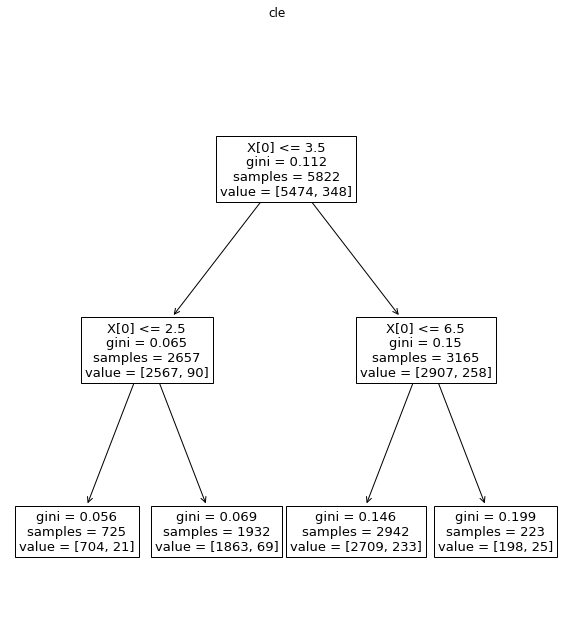

In [11]:
#revenu_moyen

print(X['revenu_moyen'].value_counts())

arbre_cla_rm=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_rm.fit(X_new[:,7].reshape(X_new.shape[0],1),varexpliquee)
rev_moy=np.repeat(-1,X_new.shape[0])
rev_moy[X_new[:,7]<=2.5]=0
rev_moy[(X_new[:,7]>2.5) & (X_new[:,7]<=3.5)]=1
rev_moy[(X_new[:,7]>3.5) & (X_new[:,7]<=6.5)]=2
rev_moy[(X_new[:,7]>6.5)]=3

print(rev_moy)

for i in range(0,5822):
    X['revenu_moyen'].iloc[i] = rev_moy[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_rm) 

print(X['revenu_moyen'].value_counts())

0    2147
1    1322
2    1144
3     547
4     326
5     187
6      67
7      51
8      22
9       9
Name: niv_etude_haut, dtype: int64
[1 0 0 ... 0 0 1]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


1    3013
0    2147
2     513
3     149
Name: niv_etude_haut, dtype: int64


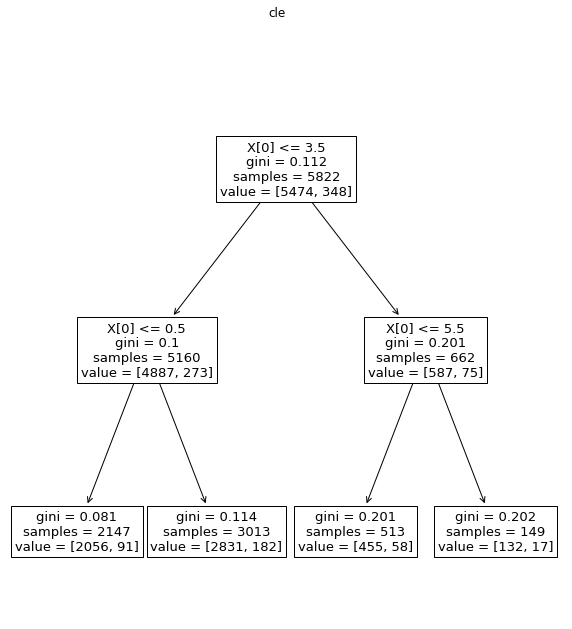

In [12]:
#niv_etude_haut

print(X['niv_etude_haut'].value_counts())

arbre_cla_neh=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_neh.fit(X_new[:,8].reshape(X_new.shape[0],1),varexpliquee)
neh=np.repeat(-1,X_new.shape[0])
neh[X_new[:,8]<=0.5]=0
neh[(X_new[:,8]>0.5) & (X_new[:,8]<=3.5)]=1
neh[(X_new[:,8]>3.5) & (X_new[:,8]<=5.5)]=2
neh[(X_new[:,8]>5.5)]=3

print(neh)

for i in range(0,5822):
    X['niv_etude_haut'].iloc[i] = neh[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_neh) 

print(X['niv_etude_haut'].value_counts())

0    1304
2    1094
3    1079
1     630
4     599
5     568
6     293
7     156
9      51
8      48
Name: revenu1, dtype: int64
[0 1 3 ... 3 0 1]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


1    1724
3    1715
0    1304
2    1079
Name: revenu1, dtype: int64


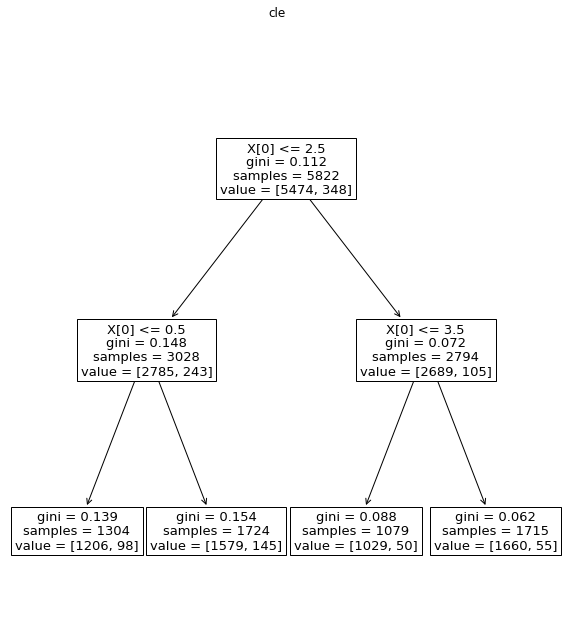

In [13]:
#revenu1

print(X['revenu1'].value_counts())

arbre_cla_r1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=100)
arbre_cla_r1.fit(X_new[:,9].reshape(X_new.shape[0],1),varexpliquee)
rev_1=np.repeat(-1,X_new.shape[0])
rev_1[X_new[:,9]<=0.5]=0
rev_1[(X_new[:,9]>0.5) & (X_new[:,9]<=2.5)]=1
rev_1[(X_new[:,9]>2.5) & (X_new[:,9]<=3.5)]=2
rev_1[(X_new[:,9]>3.5)]=3

print(rev_1)

for i in range(0,5822):
    X['revenu1'].iloc[i] = rev_1[i]

fig = plt.figure(figsize=[10,10])
fig.suptitle(B.columns[0])
plot_tree(arbre_cla_r1) 

print(X['revenu1'].value_counts())

2    1625
0    1450
3    1066
1     776
4     587
5     174
6      89
7      25
9      17
8      13
Name: auto0, dtype: int64
[1 1 1 ... 3 0 2]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1    2401
0    1450
2    1066
3     905
Name: auto0, dtype: int64


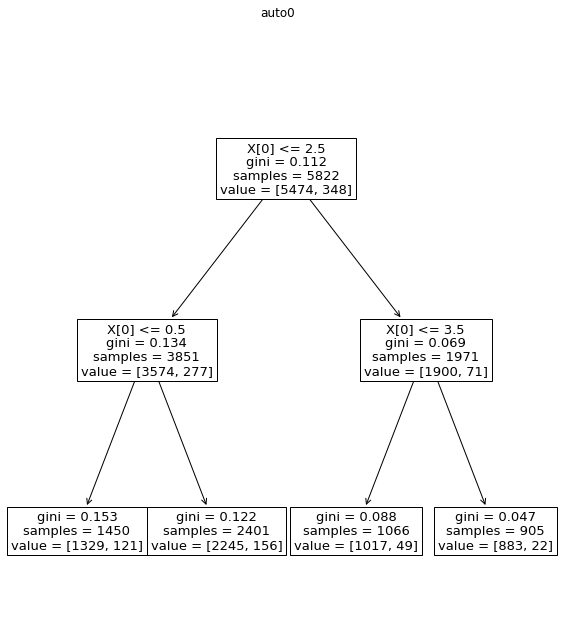

In [14]:
#auto0

print(X['auto0'].value_counts())

arbre_cla_auto0=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_auto0.fit(X_new[:,11].reshape(X_new.shape[0],1),varexpliquee)
auto0_cla=np.repeat(-1,X_new.shape[0])
auto0_cla[X_new[:,11]<=0.5]=0
auto0_cla[(X_new[:,11]>0.5) & (X_new[:,11]<=2.5)]=1
auto0_cla[(X_new[:,11]>2.5) & (X_new[:,11]<=3.5)]=2
auto0_cla[X_new[:,11]>3.5]=3

print(auto0_cla)


for i in range(0,5822):
    X['auto0'].iloc[i] = auto0_cla[i]
    
fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[11])
plot_tree(arbre_cla_auto0) 

print(X['auto0'].value_counts())

6    1663
7    1413
5    1210
9     505
4     448
8     261
3     231
2      58
0      19
1      14
Name: auto1, dtype: int64
[2 2 2 ... 2 2 2]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2    4995
3     505
1     289
0      33
Name: auto1, dtype: int64


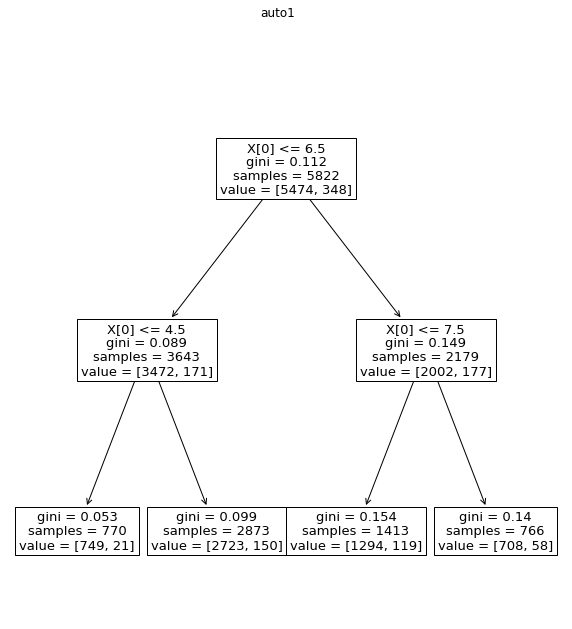

In [15]:
#auto1

print(X['auto1'].value_counts())

arbre_cla_auto1=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_auto1.fit(X_new[:,12].reshape(X_new.shape[0],1),varexpliquee)
auto1_cla=np.repeat(-1,X_new.shape[0])
auto1_cla[X_new[:,12]<=1.5]=0
auto1_cla[(X_new[:,12]>1.5) & (X_new[:,12]<=3.5)]=1
auto1_cla[(X_new[:,12]>3.5) & (X_new[:,12]<=8.5)]=2
auto1_cla[X_new[:,12]>8.5]=3

print(auto1_cla)


for i in range(0,5822):
    X['auto1'].iloc[i] = auto1_cla[i]
    
#print(B['PCSagri'])
fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[12])
plot_tree(arbre_cla_auto1) 

print(X['auto1'].value_counts())

0    1524
2    1364
1    1245
3     756
4     397
5     249
6     138
7      92
9      31
8      26
Name: PCStop, dtype: int64
[0 0 0 ... 0 0 0]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    4133
1    1402
2     256
3      31
Name: PCStop, dtype: int64


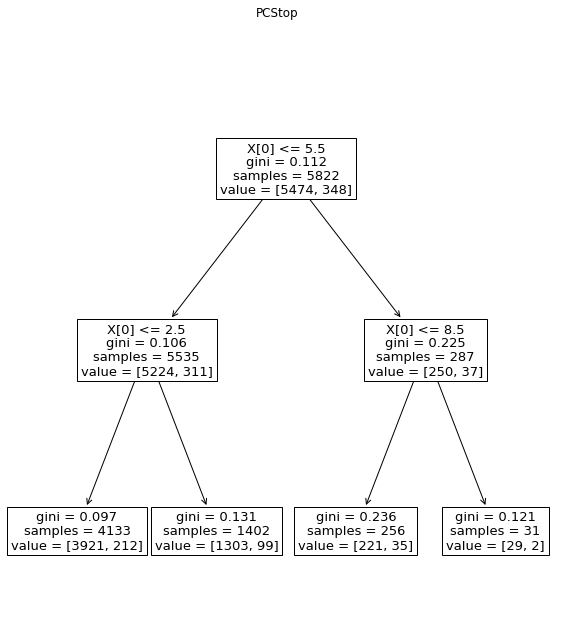

In [16]:
#PCStop

print(X['PCStop'].value_counts())

arbre_cla_PCStop=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_PCStop.fit(X_new[:,15].reshape(X_new.shape[0],1),varexpliquee)
PCStop_cla=np.repeat(-1,X_new.shape[0])
PCStop_cla[X_new[:,15]<=2.5]=0
PCStop_cla[(X_new[:,15]>2.5) & (X_new[:,15]<=5.5)]=1
PCStop_cla[(X_new[:,15]>5.5) & (X_new[:,15]<=8.5)]=2
PCStop_cla[X_new[:,15]>8.5]=3

print(PCStop_cla)


for i in range(0,5822):
    X['PCStop'].iloc[i] = PCStop_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[15])
plot_tree(arbre_cla_PCStop) 

print(X['PCStop'].value_counts())

0    3246
1    1359
2     736
3     246
4     147
5      71
6       8
9       4
8       4
7       1
Name: revenu4, dtype: int64
[0 1 0 ... 1 0 1]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0    3246
1    2341
2     235
Name: revenu4, dtype: int64


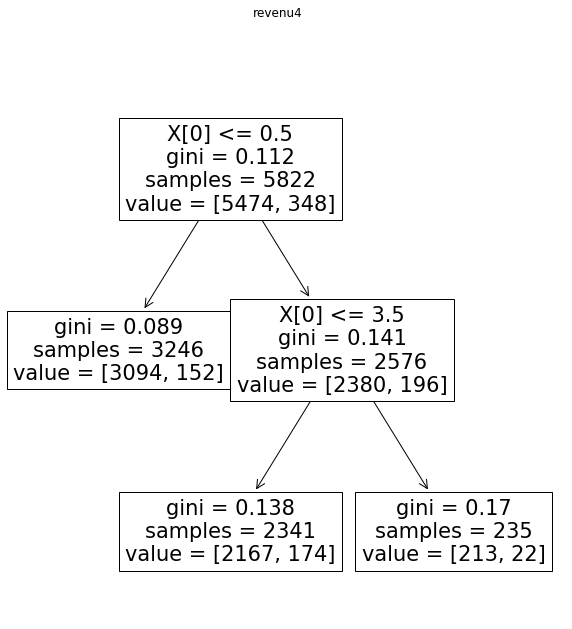

In [17]:
#revenu4

print(X['revenu4'].value_counts())

arbre_cla_revenu4=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_revenu4.fit(X_new[:,16].reshape(X_new.shape[0],1),varexpliquee)
revenu4_cla=np.repeat(-1,X_new.shape[0])
revenu4_cla[X_new[:,16]<=0.5]=0
revenu4_cla[(X_new[:,16]>0.5) & (X_new[:,16]<=3.5)]=1
revenu4_cla[X_new[:,16]>3.5]=2

print(revenu4_cla)


for i in range(0,5822):
    X['revenu4'].iloc[i] = revenu4_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[16])
plot_tree(arbre_cla_revenu4) 

print(X['revenu4'].value_counts())

3    1215
2    1165
4    1034
0     891
1     657
5     498
6     125
7      93
9      91
8      53
Name: revenu3, dtype: int64
[2 2 0 ... 1 2 1]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


1    3037
2    1894
0     891
Name: revenu3, dtype: int64


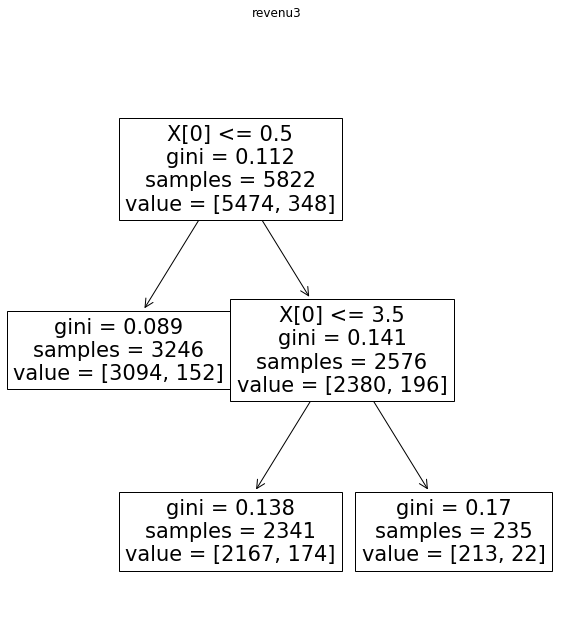

In [18]:
#revenu3

print(X['revenu3'].value_counts())

arbre_cla_revenu3=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_revenu3.fit(X_new[:,17].reshape(X_new.shape[0],1),varexpliquee)
revenu3_cla=np.repeat(-1,X_new.shape[0])
revenu3_cla[X_new[:,17]<=0.5]=0
revenu3_cla[(X_new[:,17]>0.5) & (X_new[:,17]<=3.5)]=1
revenu3_cla[X_new[:,17]>3.5]=2

print(revenu3_cla)


for i in range(0,5822):
    X['revenu3'].iloc[i] = revenu3_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[17])
plot_tree(arbre_cla_revenu4) 

print(X['revenu3'].value_counts())

2    1511
4     992
0     852
3     849
1     699
5     364
7     307
6     178
9      55
8      15
Name: assur_sante_prive, dtype: int64
[0 1 0 ... 0 0 1]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1    2360
2    1856
0    1551
3      55
Name: assur_sante_prive, dtype: int64


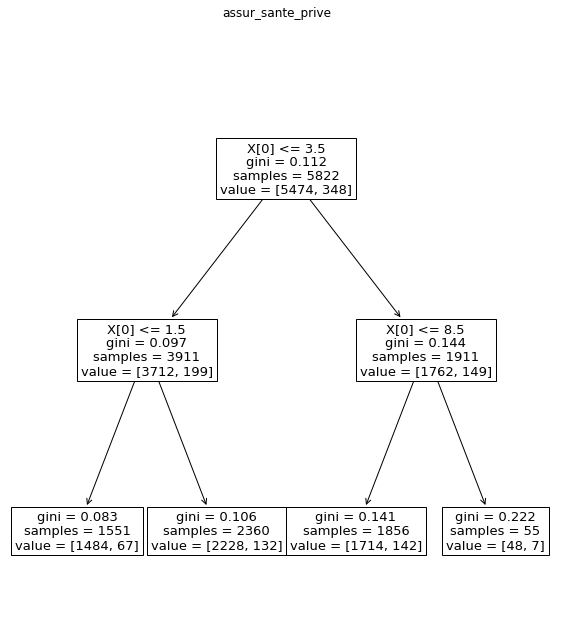

In [19]:
#assur_sante_prive

print(X['assur_sante_prive'].value_counts())

arbre_cla_assur_sante_prive=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_assur_sante_prive.fit(X_new[:,18].reshape(X_new.shape[0],1),varexpliquee)
assur_sante_prive_cla=np.repeat(-1,X_new.shape[0])
assur_sante_prive_cla[X_new[:,18]<=1.5]=0
assur_sante_prive_cla[(X_new[:,18]>1.5) & (X_new[:,18]<=3.5)]=1
assur_sante_prive_cla[(X_new[:,18]>3.5) & (X_new[:,18]<=8.5)]=2
assur_sante_prive_cla[X_new[:,18]>8.5]=3

print(assur_sante_prive_cla)


for i in range(0,5822):
    X['assur_sante_prive'].iloc[i] = assur_sante_prive_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[18])
plot_tree(arbre_cla_assur_sante_prive) 

print(X['assur_sante_prive'].value_counts())

2    1439
3    1109
1     980
0     968
4     772
5     331
6     122
7      66
9      26
8       9
Name: PCSouvr, dtype: int64
[2 3 2 ... 3 2 3]


C:\Users\tewoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3    2435
2    1439
1     980
0     968
Name: PCSouvr, dtype: int64


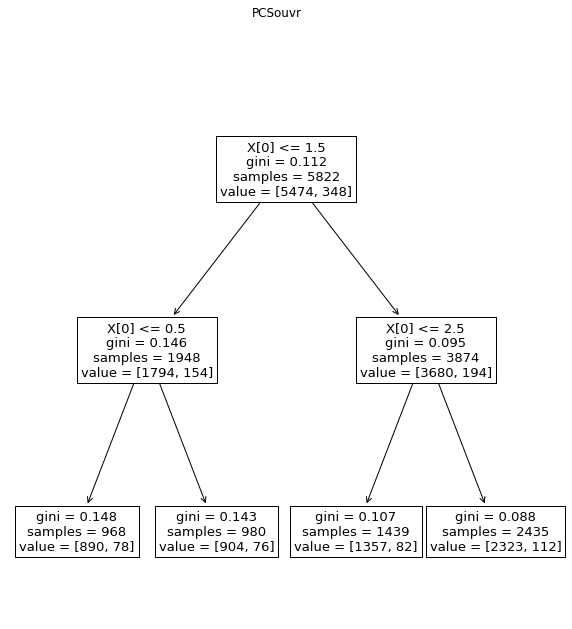

In [20]:
#PCSouvr

print(X['PCSouvr'].value_counts())

arbre_cla_PCSouvr=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
arbre_cla_PCSouvr.fit(X_new[:,19].reshape(X_new.shape[0],1),varexpliquee)
PCSouvr_cla=np.repeat(-1,X_new.shape[0])
PCSouvr_cla[X_new[:,19]<=0.5]=0
PCSouvr_cla[(X_new[:,19]>0.5) & (X_new[:,19]<=1.5)]=1
PCSouvr_cla[(X_new[:,19]>1.5) & (X_new[:,19]<=2.5)]=2
PCSouvr_cla[X_new[:,19]>2.5]=3

print(PCSouvr_cla)


for i in range(0,5822):
    X['PCSouvr'].iloc[i] = PCSouvr_cla[i]
    

fig = plt.figure(figsize=[10,10])
fig.suptitle(X.columns[19])
plot_tree(arbre_cla_PCSouvr) 

print(X['PCSouvr'].value_counts())

In [21]:
print(X)
print(B)

#Retraitement termine

      mt_auto  nb_bateau  mt_RC  pouvoir_achat  mt_incendie  mt_bateau  \
0           2          0      0              3            3          0   
1           0          0      2              4            1          0   
2           2          0      2              4            1          0   
3           2          0      0              4            1          0   
4           0          0      0              3            3          0   
...       ...        ...    ...            ...          ...        ...   
5817        2          0      2              3            2          0   
5818        0          0      0              5            3          0   
5819        2          0      2              3            2          0   
5820        2          0      0              6            0          0   
5821        0          0      1              3            0          0   

      niv_etud_bas  revenu_moyen  niv_etude_haut  revenu1  proprietaire  \
0                7             2    

[[2 0 0 ... 2 0 2]
 [0 0 2 ... 2 1 3]
 [2 0 2 ... 0 0 2]
 ...
 [2 0 2 ... 1 1 1]
 [0 0 1 ... 1 1 2]
 [2 0 2 ... 1 2 1]]
[0 0 0 ... 1 1 1]
(7230, 20)
(1808, 20)
(7230,)
(1808,)


C:\Users\tewoz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tewoz\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\tewoz\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\tewoz\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'C': 0.5994842503189421, 'penalty': 'l2', 'solver': 'liblinear'}
0.7650069156293222


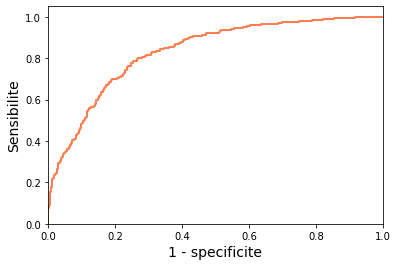

0.8318624557260921


C:\Users\tewoz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


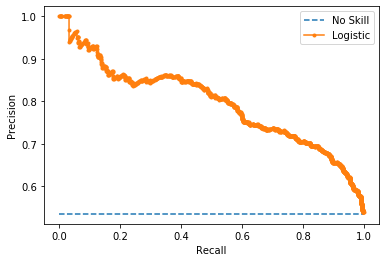

[[597 243]
 [182 786]]


precision
0.7638483965014577
rappel
0.8119834710743802
score f1
0.7871807711567351




In [22]:
#Regression logistique

#Over / Under sampling

#Resultat moyen
#from imblearn.over_sampling import SMOTE, ADASYN
#X_reglog, y_reglog = SMOTE().fit_resample(X, y)

#Mauvais resultat
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_reglog, y_reglog = nm1.fit_resample(X, y)

#Resultat moyen
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_reglog, y_reglog = smote_tomek.fit_resample(X, y)

#Resultat moyen
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_reglog, y_reglog = smote_enn.fit_resample(X, y)

print(X_reglog)
print(y_reglog)

#On fait la separation
#On separe a ce niveau pour que toutes les donnes meme x_test soit traite

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_reglog, y_reglog, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


#Standardisation car Reg Log
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

#Preprocessing termine, la base est prete, elle est stocke dans X_train,X_test,Y_train,Y_test

#Regression Logistique

#model_rl = LogisticRegression(solver='liblinear', random_state=0)
#model_rl.fit(X_train_std,y_train)

#Construction d'une grille
parameters = {'penalty':['l1', 'l2'],'C':np.logspace(-10,1,10),'solver':['liblinear','saga']}

model = LogisticRegression()
grid_reg_log = model_selection.GridSearchCV(model,param_grid = parameters,scoring='accuracy')
model_rl = grid_reg_log.fit(X_train_std,y_train)
print(model_rl.best_params_)
print(model_rl.best_score_) #realise automatiquement par validation croisee

# Courbe Roc
y_pred_proba = model_rl.predict_proba(X_test_std)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)
plt.show()

print(metrics.auc(fpr, tpr))


# precision-recall curve and f1
# predict probabilities
lr_probs = model_rl.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model_rl.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#Mesure de performance

#Prediciton
pred = model_rl.predict(X_test_std)
# matrice de confusion

print(confusion_matrix(y_test,pred))
print()
print()
#precision
print("precision")
print(precision_score(y_test,pred))
#rappel
print("rappel")
print(recall_score(y_test,pred))
#f1 score
print("score f1")
print(f1_score(y_test,pred))
print()
print()

In [23]:
#Arbre de decision

#Over / Under sampling

#Resultat moyen
#from imblearn.over_sampling import SMOTE, ADASYN
#X_ad, y_ad = SMOTE().fit_resample(X, y)

#Mauvais resultat
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_ad, y_ad = nm1.fit_resample(X, y)

#Resultat moyen
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_ad, y_ad = smote_tomek.fit_resample(X, y)

#Bon resultat
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_ad, y_ad = smote_enn.fit_resample(X, y)

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_ad, y_ad, test_size=0.2)

# définition du modèle
tree= DecisionTreeClassifier(max_depth=9)
treeC=tree.fit(X_train, y_train)

# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

# Prévision de l'échantillon test
yChap = treeOpt.predict(X_test)
# matrice de confusion
print(confusion_matrix(y_test,yChap))

Meilleur score = 0.120747, Meilleur paramètre = {'max_depth': 9}
[[662 153]
 [ 46 947]]


C:\Users\tewoz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The optimal parameters are {'C': 10, 'gamma': 1, 'kernel': 'rbf'} with a score of 0.92
0.9379161718197467


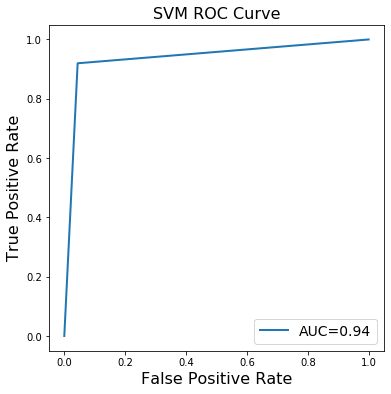

[[1046   48]
 [  88 1008]]


In [24]:
#SVM (5 minutes d execution)

#Over / Under sampling

#Bon Resultat 
from imblearn.over_sampling import SMOTE, ADASYN
X_svm, y_svm = SMOTE().fit_resample(X, y)

#Separation jeu entrainement, test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_svm, y_svm, test_size=0.2)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

# Pour svm, on doit standardiser les donnes

# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# definir les hyperp parametres 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf','sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid) 
  
# on test le modele optimal
grille = grid.fit(X_train_std, y_train) 

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grille.best_params_, grid.best_score_))

# prédire sur le jeu de test avec le modèle optimisé
y_pred = grille.predict(X_test_std)

# construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(y_test, y_pred)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)
print(auc_cv)

# La courbe ROC
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='AUC=%.2f' % auc_cv)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show()

print(confusion_matrix(y_test, y_pred))


(5822, 20)
(7230, 20)
(1808, 20)
(7230,)
(1808,)
[[606 192]
 [319 691]]
0.7071922544951591


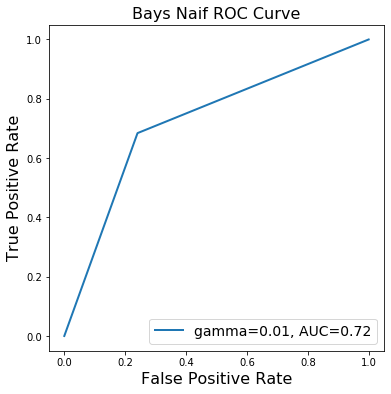

In [25]:
#Baysien naïf

#Over / Under sampling

#Resultat nul
#from imblearn.over_sampling import SMOTE, ADASYN
#X_bn, y_bn = SMOTE().fit_resample(X, y)

#Resultat catastrophique, cest de l aleatoire
#from imblearn.under_sampling import NearMiss
#nm1 = NearMiss(version=1)
#X_bn, y_bn = nm1.fit_resample(X, y)

#Resultat moyen
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X_bn, y_bn = smote_tomek.fit_resample(X, y)

#Resultat moyen
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_bn, y_bn = smote_enn.fit_resample(X, y)
print(X.shape)

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_bn, y_bn, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std,y_train)
gnb.score(X_train_std,y_train)

y_pred = gnb.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))

print(gnb.score(X_train_std,y_train))

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Bays Naif ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

Train on 5784 samples, validate on 1446 samples
Epoch 1/200
5784/5784 [==============================] - 1s 249us/sample - loss: 0.6845 - accuracy: 0.5780 - val_loss: 0.6374 - val_accuracy: 0.6722
Epoch 2/200
5784/5784 [==============================] - 1s 108us/sample - loss: 0.6164 - accuracy: 0.6890 - val_loss: 0.5769 - val_accuracy: 0.7241
Epoch 3/200
5784/5784 [==============================] - 1s 142us/sample - loss: 0.5547 - accuracy: 0.7327 - val_loss: 0.5265 - val_accuracy: 0.7420
Epoch 4/200
5784/5784 [==============================] - 1s 151us/sample - loss: 0.5112 - accuracy: 0.7605 - val_loss: 0.4959 - val_accuracy: 0.7559
Epoch 5/200
5784/5784 [==============================] - 1s 145us/sample - loss: 0.4839 - accuracy: 0.7787 - val_loss: 0.4752 - val_accuracy: 0.7649
Epoch 6/200
5784/5784 [==============================] - 1s 145us/sample - loss: 0.4651 - accuracy: 0.7908 - val_loss: 0.4584 - val_accuracy: 0.7794
Epoch 7/200
5784/5784 [==============================] - 1

5784/5784 [==============================] - 1s 134us/sample - loss: 0.2184 - accuracy: 0.9158 - val_loss: 0.2880 - val_accuracy: 0.8852
Epoch 56/200
5784/5784 [==============================] - 1s 139us/sample - loss: 0.2140 - accuracy: 0.9174 - val_loss: 0.2851 - val_accuracy: 0.8880
Epoch 57/200
5784/5784 [==============================] - 1s 100us/sample - loss: 0.2121 - accuracy: 0.9165 - val_loss: 0.2806 - val_accuracy: 0.8893
Epoch 58/200
5784/5784 [==============================] - 0s 78us/sample - loss: 0.2122 - accuracy: 0.9168 - val_loss: 0.2879 - val_accuracy: 0.8852
Epoch 59/200
5784/5784 [==============================] - 1s 117us/sample - loss: 0.2106 - accuracy: 0.9172 - val_loss: 0.2841 - val_accuracy: 0.8887
Epoch 60/200
5784/5784 [==============================] - 1s 169us/sample - loss: 0.2064 - accuracy: 0.9182 - val_loss: 0.2897 - val_accuracy: 0.8859
Epoch 61/200
5784/5784 [==============================] - 1s 93us/sample - loss: 0.2053 - accuracy: 0.9222 - val_l

Epoch 110/200
5784/5784 [==============================] - 1s 88us/sample - loss: 0.1484 - accuracy: 0.9436 - val_loss: 0.2720 - val_accuracy: 0.9073
Epoch 111/200
5784/5784 [==============================] - 1s 95us/sample - loss: 0.1476 - accuracy: 0.9471 - val_loss: 0.2602 - val_accuracy: 0.9094
Epoch 112/200
5784/5784 [==============================] - 0s 85us/sample - loss: 0.1468 - accuracy: 0.9442 - val_loss: 0.2581 - val_accuracy: 0.9108
Epoch 113/200
5784/5784 [==============================] - 0s 84us/sample - loss: 0.1454 - accuracy: 0.9461 - val_loss: 0.2531 - val_accuracy: 0.9087
Epoch 114/200
5784/5784 [==============================] - 1s 151us/sample - loss: 0.1445 - accuracy: 0.9481 - val_loss: 0.2901 - val_accuracy: 0.9039
Epoch 115/200
5784/5784 [==============================] - 1s 151us/sample - loss: 0.1449 - accuracy: 0.9469 - val_loss: 0.2523 - val_accuracy: 0.9122
Epoch 116/200
5784/5784 [==============================] - 1s 151us/sample - loss: 0.1461 - accura

5784/5784 [==============================] - 0s 79us/sample - loss: 0.1143 - accuracy: 0.9594 - val_loss: 0.2640 - val_accuracy: 0.9170
Epoch 165/200
5784/5784 [==============================] - 1s 116us/sample - loss: 0.1140 - accuracy: 0.9590 - val_loss: 0.2566 - val_accuracy: 0.9219
Epoch 166/200
5784/5784 [==============================] - 1s 126us/sample - loss: 0.1145 - accuracy: 0.9599 - val_loss: 0.2451 - val_accuracy: 0.9281
Epoch 167/200
5784/5784 [==============================] - 1s 92us/sample - loss: 0.1136 - accuracy: 0.9614 - val_loss: 0.2465 - val_accuracy: 0.9246
Epoch 168/200
5784/5784 [==============================] - 1s 139us/sample - loss: 0.1111 - accuracy: 0.9580 - val_loss: 0.2716 - val_accuracy: 0.9177
Epoch 169/200
5784/5784 [==============================] - 0s 81us/sample - loss: 0.1160 - accuracy: 0.9582 - val_loss: 0.2467 - val_accuracy: 0.9260
Epoch 170/200
5784/5784 [==============================] - 0s 80us/sample - loss: 0.1107 - accuracy: 0.9621 - v

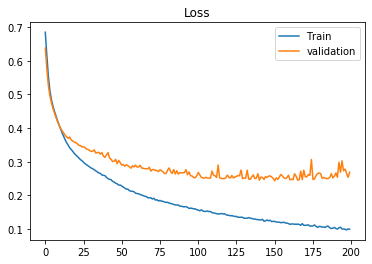

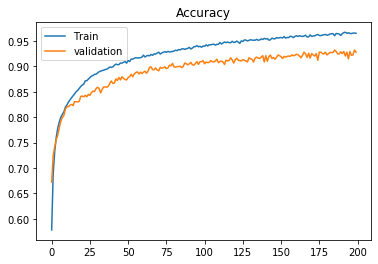

1808/1808 [==============================] - 0s 50us/sample - loss: 0.3072 - accuracy: 0.9187
(1808,)
(1808,)
[[699  96]
 [ 51 962]]


In [31]:
#Reseau de neurone

import tensorflow as tf

# Utilisation du package tensorflow a installer

#print(X)
#print(y)

from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_rn, y_rn = smote_enn.fit_resample(X, y)


from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_rn, y_rn, test_size=0.2,random_state = 1)

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation = "relu"))
model.add(tf.keras.layers.Dense(12, activation = "relu"))
model.add(tf.keras.layers.Dense(6, activation = "relu"))
model.add(tf.keras.layers.Dense(2, activation = "softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

history= model.fit(X_train_std, y_train, epochs = 200,validation_split = 0.2)

model.summary()

loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label = "Train")
plt.plot(loss_val_curve, label="validation")
plt.title("Loss")
plt.legend()
plt.show()

plt.plot(acc_curve, label = "Train")
plt.plot(acc_val_curve, label="validation")
plt.title("Accuracy")
plt.legend()
plt.show()

model.evaluate(X_test_std,y_test)

y_pred = model.predict(X_test_std)

L = []
for i in range(1808):
    if y_pred[i][0] > y_pred[i][1]:
        L.append(0)
    else:
        L.append(1)

print(y_test.shape)
y_pred_fin = np.array(L)
print(y_pred_fin.shape)
print(confusion_matrix(y_test, y_pred_fin))